In [122]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

In [123]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM

In [124]:
#Load data
company ='FB'
start = dt.datetime(2012,1,1)
end = dt.datetime(2020,1,1)
data = web.DataReader(company,'yahoo',start,end)

In [125]:
print(data)

                  High         Low        Open       Close     Volume  \
Date                                                                    
2012-05-18   45.000000   38.000000   42.049999   38.230000  573576400   
2012-05-21   36.660000   33.000000   36.529999   34.029999  168192700   
2012-05-22   33.590000   30.940001   32.610001   31.000000  101786600   
2012-05-23   32.500000   31.360001   31.370001   32.000000   73600000   
2012-05-24   33.209999   31.770000   32.950001   33.029999   50237200   
...                ...         ...         ...         ...        ...   
2019-12-24  206.789993  205.000000  206.300003  205.119995    6046300   
2019-12-26  207.820007  205.309998  205.570007  207.789993    9350700   
2019-12-27  208.929993  206.589996  208.669998  208.100006   10284200   
2019-12-30  207.899994  203.899994  207.860001  204.410004   10524300   
2019-12-31  205.559998  203.600006  204.000000  205.250000    8953500   

             Adj Close  
Date                    


In [126]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))
print(scaled_data)
prediction_days = 60
x_train =[]
y_train=[]

for x in range(prediction_days,len(scaled_data)):
    print(x,scaled_data[x-prediction_days:x,0],scaled_data[x,0])
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])
x_train,y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
print(x_train)

[[0.10261801]
 [0.08159383]
 [0.06642639]
 ...
 [0.95294592]
 [0.93447466]
 [0.93867948]]
60 [0.10261801 0.08159383 0.06642639 0.07143215 0.07658807 0.07098163
 0.05561396 0.05236022 0.05941834 0.05000751 0.04590279 0.04074687
 0.04545227 0.04294939 0.04690394 0.04645342 0.04840567 0.04775492
 0.0528608  0.06147069 0.06847875 0.07098163 0.06942985 0.07063123
 0.07668819 0.0717325  0.07693847 0.07258347 0.06822847 0.06692697
 0.06527507 0.06742755 0.06877909 0.07008059 0.07228312 0.06877909
 0.06627622 0.0654753  0.06502478 0.05266056 0.05185964 0.05696552
 0.05641488 0.0552135  0.05516344 0.05366172 0.05811684 0.0456525
 0.02993442 0.0271312  0.01992291 0.01576813 0.0115633  0.01681935
 0.02097412 0.01496721 0.01496721 0.01641889 0.02042349 0.01937228] 0.01326525310335848
61 [0.08159383 0.06642639 0.07143215 0.07658807 0.07098163 0.05561396
 0.05236022 0.05941834 0.05000751 0.04590279 0.04074687 0.04545227
 0.04294939 0.04690394 0.04645342 0.04840567 0.04775492 0.0528608
 0.06147069 0.

 0.04279922 0.04299945 0.04465135 0.04229865 0.04079691 0.04164789] 0.04204835360305384
295 [0.04630325 0.0502578  0.04855584 0.0562647  0.0529609  0.04925665
 0.04585273 0.04700406 0.0466036  0.04480153 0.04550233 0.04675377
 0.04440107 0.04204835 0.04264905 0.04019623 0.03969565 0.03719277
 0.0366922  0.03293788 0.03188667 0.02798218 0.03413926 0.03313811
 0.03063523 0.02898334 0.02587976 0.02623016 0.02783201 0.033038
 0.03153627 0.03023477 0.03003454 0.02953396 0.03148621 0.0324373
 0.03293788 0.03088552 0.03403915 0.03108575 0.03263754 0.03218702
 0.03468989 0.03579116 0.03544076 0.03343846 0.03398909 0.03323823
 0.03494018 0.03879461 0.04039645 0.04044651 0.04094709 0.04279922
 0.04299945 0.04465135 0.04229865 0.04079691 0.04164789 0.04204835] 0.043950546461062945
296 [0.0502578  0.04855584 0.0562647  0.0529609  0.04925665 0.04585273
 0.04700406 0.0466036  0.04480153 0.04550233 0.04675377 0.04440107
 0.04204835 0.04264905 0.04019623 0.03969565 0.03719277 0.0366922
 0.03293788 0.0

 0.11788556 0.11793563 0.12083896 0.12038844 0.12479351 0.13125094] 0.13170146324774926
328 [0.02953396 0.03148621 0.0324373  0.03293788 0.03088552 0.03403915
 0.03108575 0.03263754 0.03218702 0.03468989 0.03579116 0.03544076
 0.03343846 0.03398909 0.03323823 0.03494018 0.03879461 0.04039645
 0.04044651 0.04094709 0.04279922 0.04299945 0.04465135 0.04229865
 0.04079691 0.04164789 0.04204835 0.04395055 0.08324574 0.08149371
 0.0886019  0.09961456 0.09545978 0.09891376 0.10171697 0.10742353
 0.10421985 0.10582169 0.1041698  0.10396957 0.10256796 0.09656105
 0.09470892 0.09425841 0.0968614  0.1005156  0.10351905 0.10306853
 0.10421985 0.11423136 0.11818592 0.10967613 0.11423136 0.11788556
 0.11793563 0.12083896 0.12038844 0.12479351 0.13125094 0.13170146] 0.129498918118861
329 [0.03148621 0.0324373  0.03293788 0.03088552 0.03403915 0.03108575
 0.03263754 0.03218702 0.03468989 0.03579116 0.03544076 0.03343846
 0.03398909 0.03323823 0.03494018 0.03879461 0.04039645 0.04044651
 0.04094709 0.

532 [0.19632578 0.20253291 0.22365721 0.2073885  0.20423487 0.20603694
 0.2070381  0.21019173 0.20628723 0.21780048 0.22676077 0.21840117
 0.21594834 0.20013015 0.19227111 0.20233269 0.21049206 0.21734996
 0.21389598 0.21770036 0.20423487 0.19852831 0.19537467 0.19777745
 0.21074236 0.21074236 0.2077389  0.20118135 0.20168194 0.20763878
 0.20438505 0.21404616 0.21419633 0.2183511  0.22901336 0.22916353
 0.23076539 0.22811233 0.22701107 0.22595985 0.22831256 0.22756169
 0.22410773 0.22600992 0.24047653 0.2405266  0.23306803 0.23411924
 0.23256747 0.23361867 0.23962556 0.2333183  0.23411924 0.23847426
 0.24022627 0.24883618 0.24728437 0.24963708 0.2480853  0.25193972] 0.2438804489881676
533 [0.20253291 0.22365721 0.2073885  0.20423487 0.20603694 0.2070381
 0.21019173 0.20628723 0.21780048 0.22676077 0.21840117 0.21594834
 0.20013015 0.19227111 0.20233269 0.21049206 0.21734996 0.21389598
 0.21770036 0.20423487 0.19852831 0.19537467 0.19777745 0.21074236
 0.21074236 0.2077389  0.20118135 0

549 [0.21734996 0.21389598 0.21770036 0.20423487 0.19852831 0.19537467
 0.19777745 0.21074236 0.21074236 0.2077389  0.20118135 0.20168194
 0.20763878 0.20438505 0.21404616 0.21419633 0.2183511  0.22901336
 0.22916353 0.23076539 0.22811233 0.22701107 0.22595985 0.22831256
 0.22756169 0.22410773 0.22600992 0.24047653 0.2405266  0.23306803
 0.23411924 0.23256747 0.23361867 0.23962556 0.2333183  0.23411924
 0.23847426 0.24022627 0.24883618 0.24728437 0.24963708 0.2480853
 0.25193972 0.24388045 0.24307955 0.23807379 0.22540921 0.23647195
 0.23597138 0.24332981 0.25113882 0.2474846  0.24993745 0.24368025
 0.2537418  0.25864745 0.25799668 0.26810833 0.28657958 0.28763079] 0.2862792135739137
550 [0.21389598 0.21770036 0.20423487 0.19852831 0.19537467 0.19777745
 0.21074236 0.21074236 0.2077389  0.20118135 0.20168194 0.20763878
 0.20438505 0.21404616 0.21419633 0.2183511  0.22901336 0.22916353
 0.23076539 0.22811233 0.22701107 0.22595985 0.22831256 0.22756169
 0.22410773 0.22600992 0.24047653 0

763 [0.30890525 0.29944438 0.29954448 0.30635231 0.30194726 0.30204735
 0.30850479 0.31626372 0.3254743  0.33073036 0.33388397 0.33828902
 0.32632527 0.3267758  0.32822748 0.32772687 0.32282125 0.32006807
 0.31951743 0.32392252 0.32332182 0.32312159 0.32257095 0.32192021
 0.3267758  0.32932871 0.32527406 0.32327175 0.31561295 0.32717624
 0.32982932 0.33488511 0.32377236 0.31936727 0.32126948 0.31511238
 0.31406118 0.30555137 0.30665264 0.3057516  0.29949441 0.30219752
 0.30384943 0.3042499  0.30174702 0.29899384 0.3038995  0.31856637
 0.31381087 0.31611352 0.31486208 0.31446165 0.31411125 0.31441158
 0.30835462 0.31446165 0.31245934 0.30765382 0.31316014 0.31391101] 0.32392252465780624
764 [0.29944438 0.29954448 0.30635231 0.30194726 0.30204735 0.30850479
 0.31626372 0.3254743  0.33073036 0.33388397 0.33828902 0.32632527
 0.3267758  0.32822748 0.32772687 0.32282125 0.32006807 0.31951743
 0.32392252 0.32332182 0.32312159 0.32257095 0.32192021 0.3267758
 0.32932871 0.32527406 0.32327175 

 0.38899736 0.39655603 0.38264003 0.38824649 0.39675626 0.38784602] 0.3818391270921663
805 [0.30384943 0.3042499  0.30174702 0.29899384 0.3038995  0.31856637
 0.31381087 0.31611352 0.31486208 0.31446165 0.31411125 0.31441158
 0.30835462 0.31446165 0.31245934 0.30765382 0.31316014 0.31391101
 0.32392252 0.32197028 0.32242078 0.31506231 0.31506231 0.32252092
 0.32086901 0.31936727 0.31526255 0.31701456 0.32066878 0.32627524
 0.32427293 0.33543574 0.35115381 0.35605947 0.35165442 0.35180459
 0.34074187 0.34059167 0.34629826 0.34820044 0.34950194 0.34785004
 0.339991   0.3411423  0.35150422 0.3622666  0.36016419 0.36056466
 0.36602092 0.38664465 0.40136159 0.40376433 0.39700656 0.38899736
 0.39655603 0.38264003 0.38824649 0.39675626 0.38784602 0.38183913] 0.3824898617025686
806 [0.3042499  0.30174702 0.29899384 0.3038995  0.31856637 0.31381087
 0.31611352 0.31486208 0.31446165 0.31411125 0.31441158 0.30835462
 0.31446165 0.31245934 0.30765382 0.31316014 0.31391101 0.32392252
 0.32197028 0.

1004 [0.44766483 0.43915502 0.44626319 0.45222005 0.45146918 0.44646343
 0.46098013 0.46163086 0.45977876 0.45382189 0.4405066  0.44150774
 0.44941684 0.44846574 0.45892779 0.46133053 0.46523501 0.47279372
 0.46698702 0.4691395  0.47114181 0.47314412 0.47459579 0.47714874
 0.48035242 0.49261651 0.48540821 0.48240476 0.49221604 0.47464586
 0.47299395 0.48045252 0.48010212 0.46503478 0.45682534 0.46493468
 0.46443411 0.46608598 0.46007909 0.46413374 0.47334435 0.47399509
 0.47910098 0.46468438 0.46238173 0.45567404 0.45632477 0.49556992
 0.49982481 0.5047805  0.49907394 0.50222755 0.50097611 0.50938578
 0.50813434 0.51444161 0.50953595 0.51334034 0.51098762 0.50528107] 0.498673468006258
1005 [0.43915502 0.44626319 0.45222005 0.45146918 0.44646343 0.46098013
 0.46163086 0.45977876 0.45382189 0.4405066  0.44150774 0.44941684
 0.44846574 0.45892779 0.46133053 0.46523501 0.47279372 0.46698702
 0.4691395  0.47114181 0.47314412 0.47459579 0.47714874 0.48035242
 0.49261651 0.48540821 0.48240476

1045 [0.47399509 0.47910098 0.46468438 0.46238173 0.45567404 0.45632477
 0.49556992 0.49982481 0.5047805  0.49907394 0.50222755 0.50097611
 0.50938578 0.50813434 0.51444161 0.50953595 0.51334034 0.51098762
 0.50528107 0.49867347 0.50017521 0.49597035 0.49867347 0.49176554
 0.50042548 0.50137658 0.50928569 0.50883515 0.50598187 0.5058317
 0.50658257 0.50427993 0.50588177 0.50072585 0.50387946 0.50473043
 0.49501929 0.48165389 0.48660961 0.48490764 0.48385643 0.47699853
 0.47875058 0.48380636 0.48145369 0.48731042 0.47229315 0.45672524
 0.47539669 0.48270513 0.4833058  0.4828553  0.48290533 0.49541972
 0.49116483 0.49812283 0.50127648 0.50157682 0.49582019 0.49837313] 0.49622065796147286
1046 [0.47910098 0.46468438 0.46238173 0.45567404 0.45632477 0.49556992
 0.49982481 0.5047805  0.49907394 0.50222755 0.50097611 0.50938578
 0.50813434 0.51444161 0.50953595 0.51334034 0.51098762 0.50528107
 0.49867347 0.50017521 0.49597035 0.49867347 0.49176554 0.50042548
 0.50137658 0.50928569 0.5088351

1275 [0.61175353 0.60459526 0.61000148 0.60970115 0.6137558  0.61365574
 0.62086397 0.62531909 0.62411775 0.62231568 0.62346698 0.6207138
 0.62131454 0.61791059 0.61595835 0.61725982 0.61165339 0.60995145
 0.60900035 0.61916203 0.61685942 0.62341695 0.63107575 0.63047501
 0.63943536 0.64454125 0.64489161 0.65059817 0.66336287 0.67442562
 0.67602743 0.67112181 0.66636635 0.66331284 0.66741752 0.66451417
 0.66356306 0.66231163 0.66376334 0.66306253 0.66101016 0.63633181
 0.65039798 0.65240025 0.65330132 0.65245036 0.66231163 0.67192275
 0.67277371 0.67402515 0.66941987 0.66977023 0.68018221 0.68028235
 0.67617759 0.67772937 0.68568858 0.66010916 0.65430246 0.66551531] 0.6633628680687803
1276 [0.60459526 0.61000148 0.60970115 0.6137558  0.61365574 0.62086397
 0.62531909 0.62411775 0.62231568 0.62346698 0.6207138  0.62131454
 0.61791059 0.61595835 0.61725982 0.61165339 0.60995145 0.60900035
 0.61916203 0.61685942 0.62341695 0.63107575 0.63047501 0.63943536
 0.64454125 0.64489161 0.65059817

 0.77499126 0.78094812 0.7848526  0.79281174 0.79241127 0.7850528 ] 0.7871552076136139
1366 [0.77449065 0.75847224 0.76152576 0.75872255 0.75516843 0.76032435
 0.77213794 0.76838362 0.76813332 0.74921156 0.75261552 0.76598088
 0.76723232 0.76222656 0.74675879 0.74926167 0.75111378 0.76042449
 0.75576917 0.75091358 0.74380541 0.7484107  0.75246535 0.76182609
 0.77208791 0.77233821 0.76583071 0.77268857 0.77829507 0.76698201
 0.77979674 0.77704363 0.77749413 0.76703212 0.770436   0.76227659
 0.77484109 0.77308904 0.76778295 0.76492964 0.72653549 0.73324326
 0.75061317 0.75586923 0.76658154 0.75957352 0.76202636 0.75431746
 0.76843373 0.77338938 0.77474095 0.7701857  0.77594236 0.77499126
 0.78094812 0.7848526  0.79281174 0.79241127 0.7850528  0.78715521] 0.7685838933693487
1367 [0.75847224 0.76152576 0.75872255 0.75516843 0.76032435 0.77213794
 0.76838362 0.76813332 0.74921156 0.75261552 0.76598088 0.76723232
 0.76222656 0.74675879 0.74926167 0.75111378 0.76042449 0.75576917
 0.75091358 

1518 [0.83085552 0.82399758 0.83846421 0.8361115  0.82169497 0.83325826
 0.83160635 0.83776341 0.77504129 0.75296588 0.75917305 0.73664714
 0.70911548 0.71246933 0.67322421 0.67727887 0.71111775 0.68909245
 0.6926966  0.68764082 0.70886518 0.69815286 0.70180704 0.73739797
 0.74380541 0.73154125 0.73479504 0.73634681 0.75551887 0.74400561
 0.75271565 0.74360514 0.7414026  0.71061722 0.71061722 0.78305053
 0.78019721 0.77223807 0.78154878 0.79261154 0.78234972 0.79531462
 0.80212245 0.8068779  0.82559946 0.83996596 0.84727439 0.84552235
 0.83390903 0.82830253 0.83110574 0.82569952 0.83476    0.83130602
 0.84682382 0.84196823 0.83691244 0.8410172  0.85067827 0.87125193] 0.882314689628253
1519 [0.82399758 0.83846421 0.8361115  0.82169497 0.83325826 0.83160635
 0.83776341 0.77504129 0.75296588 0.75917305 0.73664714 0.70911548
 0.71246933 0.67322421 0.67727887 0.71111775 0.68909245 0.6926966
 0.68764082 0.70886518 0.69815286 0.70180704 0.73739797 0.74380541
 0.73154125 0.73479504 0.73634681 

1577 [0.87125193 0.88231469 0.87876057 0.87705863 0.86904939 0.85323118
 0.85783654 0.87005052 0.87435548 0.87440559 0.89643088 0.8916254
 0.90393952 0.89983484 0.92241077 0.91990789 0.9211093  0.89412828
 0.9073935  0.89157529 0.89352754 0.8839666  0.89918406 0.87600739
 0.90464032 0.92856783 0.93612657 0.9301196  0.92511385 0.94703909
 0.94904143 0.94859086 0.9624068  0.95925314 0.95289581 0.96215649
 0.96701208 0.9858337  1.         0.79356257 0.78670471 0.76753265
 0.77514142 0.77048603 0.79411321 0.80117134 0.84076689 0.83135605
 0.83821391 0.8277519  0.8135856  0.81253443 0.81784052 0.80993142
 0.7857536  0.78124845 0.77474095 0.77534162 0.78044751 0.77674322] 0.7855032987669478
1578 [0.88231469 0.87876057 0.87705863 0.86904939 0.85323118 0.85783654
 0.87005052 0.87435548 0.87440559 0.89643088 0.8916254  0.90393952
 0.89983484 0.92241077 0.91990789 0.9211093  0.89412828 0.9073935
 0.89157529 0.89352754 0.8839666  0.89918406 0.87600739 0.90464032
 0.92856783 0.93612657 0.9301196  

1731 [0.63307803 0.63107575 0.63903489 0.65685537 0.64979723 0.65360166
 0.66231163 0.64994748 0.63357863 0.64123743 0.6571557  0.64944687
 0.633028   0.66421384 0.74565752 0.7407519  0.75847224 0.76803326
 0.76467941 0.74410575 0.7488612  0.74115229 0.73739797 0.73254246
 0.73194172 0.72468339 0.72363214 0.72498372 0.71236919 0.72162987
 0.73529557 0.73284279 0.72623516 0.71942733 0.72358211 0.7490614
 0.76853379 0.77479098 0.75787158 0.76022429 0.77258851 0.7718376
 0.77909594 0.76307753 0.7421034  0.71452171 0.72002807 0.73940032
 0.742604   0.73389396 0.74365517 0.75061317 0.74155276 0.73995096
 0.74565752 0.75571906 0.78325072 0.77994691 0.79236124 0.7908595 ] 0.7869049045068249
1732 [0.63107575 0.63903489 0.65685537 0.64979723 0.65360166 0.66231163
 0.64994748 0.63357863 0.64123743 0.6571557  0.64944687 0.633028
 0.66421384 0.74565752 0.7407519  0.75847224 0.76803326 0.76467941
 0.74410575 0.7488612  0.74115229 0.73739797 0.73254246 0.73194172
 0.72468339 0.72363214 0.72498372 0.

1795 [0.80777898 0.81053208 0.8066276  0.8061771  0.80367422 0.81949243
 0.83120588 0.82519899 0.87866043 0.8698003  0.8862692  0.87936124
 0.87750913 0.87500625 0.88972319 0.88176405 0.86119039 0.86003901
 0.85558389 0.85403212 0.81999296 0.81593831 0.84367024 0.84727439
 0.83881465 0.82589979 0.83641191 0.83891479 0.81663911 0.81759022
 0.83385893 0.82324675 0.82735143 0.79961957 0.73294285 0.74971217
 0.75306602 0.75386696 0.77899588 0.78635434 0.80277322 0.78745554
 0.79961957 0.81894179 0.85738597 0.85468289 0.84972717 0.85998898
 0.86804825 0.87535669 0.856535   0.85062824 0.85983881 0.87735896
 0.87735896 0.88737048 0.89838313 0.89437851 0.89117482 0.90844475] 0.926064953503448
1796 [0.81053208 0.8066276  0.8061771  0.80367422 0.81949243 0.83120588
 0.82519899 0.87866043 0.8698003  0.8862692  0.87936124 0.87750913
 0.87500625 0.88972319 0.88176405 0.86119039 0.86003901 0.85558389
 0.85403212 0.81999296 0.81593831 0.84367024 0.84727439 0.83881465
 0.82589979 0.83641191 0.83891479

In [127]:
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()

test_data = web.DataReader(company,'yahoo',test_start,test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'],test_data['Close']),axis=0)

model_inputs = total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values

model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)
print(model_inputs)

[[0.81068225]
 [0.80102117]
 [0.81153329]
 [0.81243429]
 [0.83325826]
 [0.828703  ]
 [0.8567853 ]
 [0.86008912]
 [0.86429394]
 [0.84156783]
 [0.86114028]
 [0.82399758]
 [0.8430695 ]
 [0.84422088]
 [0.85177954]
 [0.85933821]
 [0.85888771]
 [0.85358162]
 [0.87060116]
 [0.88046251]
 [0.88596887]
 [0.8839666 ]
 [0.87010063]
 [0.8644441 ]
 [0.86654651]
 [0.86038945]
 [0.88471743]
 [0.87831007]
 [0.8781098 ]
 [0.88787108]
 [0.89938426]
 [0.90899538]
 [0.8999349 ]
 [0.90203731]
 [0.9064925 ]
 [0.91134802]
 [0.90724334]
 [0.92241077]
 [0.9206087 ]
 [0.91089752]
 [0.9064925 ]
 [0.90594187]
 [0.90919558]
 [0.91765532]
 [0.91910695]
 [0.91675424]
 [0.92371224]
 [0.89613055]
 [0.88291536]
 [0.90198728]
 [0.90433999]
 [0.92491365]
 [0.94273413]
 [0.94393554]
 [0.9433348 ]
 [0.93802871]
 [0.95139407]
 [0.95294592]
 [0.93447466]
 [0.93867948]
 [0.93867948]
 [0.96135555]
 [0.95579916]
 [0.97547182]
 [0.97777443]
 [0.98858688]
 [1.00400462]
 [1.00280321]
 [1.0220754 ]
 [1.00780897]
 [1.01827098]
 [1.02

In [128]:
x_test = []
for x in range(prediction_days,len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])
x_test=np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
print(x_test)

[[[0.81068225]
  [0.80102117]
  [0.81153329]
  ...
  [0.95294592]
  [0.93447466]
  [0.93867948]]

 [[0.80102117]
  [0.81153329]
  [0.81243429]
  ...
  [0.93447466]
  [0.93867948]
  [0.93867948]]

 [[0.81153329]
  [0.81243429]
  [0.83325826]
  ...
  [0.93867948]
  [0.93867948]
  [0.96135555]]

 ...

 [[1.29844318]
  [1.2805726 ]
  [1.28377635]
  ...
  [1.23416929]
  [1.18926765]
  [1.24147765]]

 [[1.2805726 ]
  [1.28377635]
  [1.29058411]
  ...
  [1.18926765]
  [1.24147765]
  [1.23727283]]

 [[1.28377635]
  [1.29058411]
  [1.29118493]
  ...
  [1.24147765]
  [1.23727283]
  [1.28222458]]]


In [129]:
model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=25,batch_size=32)


Epoch 1/25
59/59 [==============================] - 4s 72ms/step - loss: 0.0205: 0s - loss: 
Epoch 2/25
59/59 [==============================] - 4s 71ms/step - loss: 0.0043
Epoch 3/25
59/59 [==============================] - 4s 72ms/step - loss: 0.0040
Epoch 4/25
59/59 [==============================] - 4s 71ms/step - loss: 0.0034
Epoch 5/25
59/59 [==============================] - 4s 70ms/step - loss: 0.0032: 0s - loss: 0.003
Epoch 6/25
59/59 [==============================] - 4s 70ms/step - loss: 0.0045
Epoch 7/25
59/59 [==============================] - 4s 71ms/step - loss: 0.0035
Epoch 8/25
59/59 [==============================] - 4s 70ms/step - loss: 0.0026: 0s - loss: 0.00
Epoch 9/25
59/59 [==============================] - 4s 71ms/step - loss: 0.0029
Epoch 10/25
59/59 [==============================] - 4s 71ms/step - loss: 0.0028
Epoch 11/25
59/59 [==============================] - 4s 72ms/step - loss: 0.0029
Epoch 12/25
59/59 [==============================] - 4s 71ms/step - lo

In [130]:
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

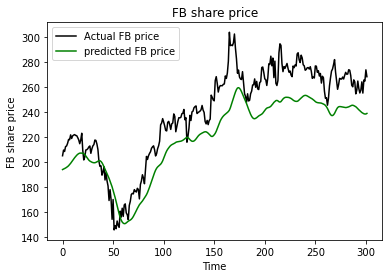

In [131]:
plt.plot(actual_prices,color='black',label=f'Actual {company} price')
plt.plot(predicted_prices,color='green',label=f'predicted {company} price')
plt.title(f'{company} share price')
plt.xlabel('Time')
plt.ylabel(f'{company} share price')
plt.legend()
plt.show()